# Exercises for Introduction to Quantum Computing

Name: Pugazharasu Anancia Devaneyan (s6puanan) <br />
Matriculation number: 3300280

## 1. Installation of Qiskit

In [ ]:
%pip install qiskit

In [2]:
import numpy as np
import qiskit as qi
from qiskit import IBMQ, Aer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, transpile

from qiskit.visualization import plot_histogram

## 2. Quantum Gates

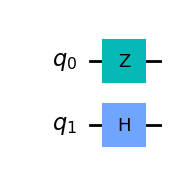

In [3]:
circ_1 = QuantumCircuit(2)
circ_1.z(0)
circ_1.h(1)
circ_1.draw('mpl')

In the standard computational basis, this two-qubit system can be written as,
$$\begin{pmatrix}
1 & 0 & 0 & 0 \\
0 & -1 & 0 & 0 \\
0 & 0 & \frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}}\\
0 & 0 & \frac{1}{\sqrt{2}} & \frac{-1}{\sqrt{2}}
\end{pmatrix} \begin{pmatrix}
\alpha \\
\beta \\
\gamma \\
\delta
\end{pmatrix} = \begin{pmatrix}
\alpha \\
-\beta \\
\frac{\gamma}{\sqrt{2}} + \frac{\delta}{\sqrt{2}} \\
\frac{\gamma}{\sqrt{2}} - \frac{\delta}{\sqrt{2}} 
\end{pmatrix}$$

Now, for the next two-qubit system,

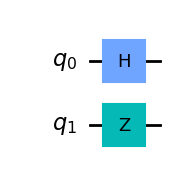

In [4]:
circ_2 = QuantumCircuit(2)
circ_2.z(1)
circ_2.h(0)
circ_2.draw('mpl')

In the standard computational basis, this two-qubit system can be written as,
$$\begin{pmatrix}
\frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}} & 0 & 0 \\
\frac{1}{\sqrt{2}} & \frac{-1}{\sqrt{2}} & 0 & 0 \\
0 & 0 & 1 & 0\\
0 & 0 & 0 & -1
\end{pmatrix} \begin{pmatrix}
\alpha \\
\beta \\
\gamma \\
\delta
\end{pmatrix} = \begin{pmatrix}
\frac{\alpha}{\sqrt{2}} + \frac{\beta}{\sqrt{2}}\\
\frac{\alpha}{\sqrt{2}} - \frac{\beta}{\sqrt{2}} \\
\gamma \\
-\delta
\end{pmatrix}$$

## 3. Quantum Circuits

A well known identity involving CNOT gates is that,
$$H \otimes H \ CNOT_{1,2} \ H \otimes H = CNOT_{2,1}$$

Applying this to the circuit in the RHS, we have,
$$(\mathbb{I} \otimes H)CNOT_{2,1}(\mathbb{I} \otimes H) = (\mathbb{I} \otimes H)(H \otimes H \ CNOT_{1,2} \ H \otimes H)(\mathbb{I} \otimes H)$$

Since we know that the Hadarmard gate is self-inverse i.e. squares to identity,
$$H^{2} = \mathbb{I}$$
thus we have,
$$(\mathbb{I} \otimes H)CNOT_{2,1}(\mathbb{I} \otimes H) = (H \otimes \mathbb{I}) CNOT_{1,2}(H \otimes \mathbb{I})$$

We can also prove this equivalence using qiskit,

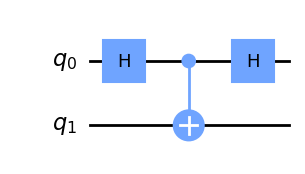

In [5]:
circ_3 = QuantumCircuit(2)
circ_3.h(0)
circ_3.cx(0,1)
circ_3.h(0)
circ_3.draw('mpl')

Now to evaluate the RHS,

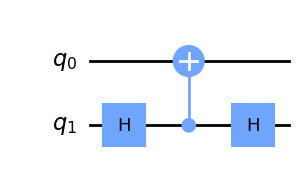

In [6]:
circ_4 = QuantumCircuit(2)
circ_4.h(1)
circ_4.cx(1,0)
circ_4.h(1)
circ_4.draw('mpl')

Proving their equivalence upto the equivalence of statevectors and unitary matrices using qiskit,

In [7]:
#checking if both the circuits produce the same state vectors
from qiskit.quantum_info import Statevector
Statevector.from_instruction(circ_3).equiv(Statevector.from_instruction(circ_4))

True

In [8]:
#checking if both the circuits produce the unitary matrix
backend_sim = Aer.get_backend('unitary_simulator')
job_sim = qi.execute([circ_3, circ_4], backend_sim)
result_sim = job_sim.result()
unitary1 = result_sim.get_unitary(circ_3)
unitary2 = result_sim.get_unitary(circ_4)

np.allclose(unitary1, unitary2) 

True

## 4. No-Cloning Theorem

We shall now create a quantum circuit that copies the states |0⟩ and |1⟩ into a target qubit, where the latter is initialized in the state $| 0 \rangle$

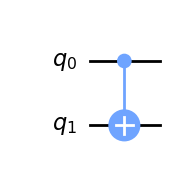

In [9]:
circ_5 = QuantumCircuit(2)
circ_5.cx(0,1)
circ_5.draw('mpl')

We can check using Qiskit if this circuit acts as a copying circuit,

In [10]:
state = qi.quantum_info.Statevector.from_label('01')
state.draw(output='latex')

<IPython.core.display.Latex object>

In [11]:
state = state.evolve(circ_5)
state.draw(output='latex')

<IPython.core.display.Latex object>

We shall now create a quantum circuit that copies the states $|+ \rangle$ and $|-\rangle$ into a target qubit, where the latter is initialized in the state $| 0 \rangle$

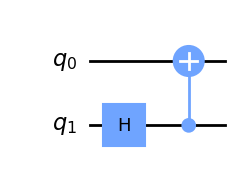

In [12]:
circ_6 = QuantumCircuit(2)
circ_6.h(1)
circ_6.cx(1,0)
circ_6.draw('mpl')

In [13]:
state_2 = qi.quantum_info.Statevector.from_label('0-')
state_2.draw(output='latex')

<IPython.core.display.Latex object>

In [14]:
state_2 = state_2.evolve(circ_6)
state_2.draw(output='latex')

<IPython.core.display.Latex object>